In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Observações gerais

É um dataset fadado ao overfitting especialmente por ser pequeno, mas há um lado bom nisso, testar alguns limites dos modelos em identificar padrões mesmo em situações escassas, na prática esse objetivo resume os testes feitos com 3 diferentes modelos de redes neurais (por enquanto)

* convolutional neural network (CNN) lidando com entradas de 1 dimensão
* CNN com entradas de 2 dimensões
* Recurrent Neural Network com o gerenciamento de memória feito pelo GRU (Gated Recurrent Unit)

Dentre as redes convolucionais e a rede reecorrente implementada há uma enorme diferença inicial: as CNN obrigam um tamanho fixo na entrada enquanto a RNN permite tamanhos variáveis devido ao uso da camada embarcada (que também seria aplicável às redes convolucionais mas eu queria testar este aspecto).

O único problema do tamanho variável de entrada está no DataLoader do pytorch cujos lotes são feitos para trabalhar com tamanhos fixos, de modo que o tempo de execução foi de praticamente 1 minuto para cada época na RNN e foi necessário adicionar events no ignite para calcular a média de custo para cada época já que por padrão ele registra apenas o último. Este fato torna implícita a forma como os pesos foram atualizados, em vez de ocorrer ao fim de cada lote, foi feito ao fim de cada item do dataset de treinamento.

|--| CNN 1d | CNN 2d |RNN|
|--|--|--|--|
| épocas | 150 | 50 | 20 |
| taxa de aprendizado | 1e-3 | 1e-3 | 1e-4 |
| dropout | sim | não | sim |

Foi necessário reduzir a taxa de aprendizado da RNN para observar melhor seu desenvolvimento, ela estava evoluindo muito rápido e em muitos casos parecia convergir muito rapidamente usando a mesma taxa de aprendizado que a usada nas redes convolucionais.

## Modelos de redes neurais

![](models.png)

*na ordem: CNN 1d, CNN 2dm RNN*

## Preparação dos dados

* Remover stop words com o NLTK
* converter para minusculas, retirar pontuação, etc com o simple_preprocess do gesim
* treinar o modelo skip-gram do word2vec com o gensim

O dataset foi dividido na proporção 75%-25%, ficando da seguinte forma:

* treino: 2250
* teste: 750

## Visualizando os resultados

Os 3 gráficos abaixo meio que dizem a mesma coisa:

1. No CNN 1d grande parte do aprendizado ficou estagnado numa pequena faixa de acertos
2. No CNN 2d e RNN vemos quase uma simetria na distribuição entre a acurácia em relação ao dataset de treinamento e o *loss* indicando a forma mais suave como se deu o aprendizado
3. o RNN foi o que os resultados da acurácia sobre o dataset de treinamento e o de testes se manteve mais estável observando mais uma vez quase uma simetria.

Enquanto no CNN 2d vemos no boxplot uma maior distribuição entre acurácia de treino e teste, o que confirma uma breve análise visual do 1º gráfico que não deixa ainda tão aparente o overfitting, enquanto no RNN a variação de acurácia no testes variava entre 72.8% e 74% de acerto, ainda assim esse é o valor mais alto entre todos os modelos testados.

In [10]:
df = pd.read_csv("results.csv")

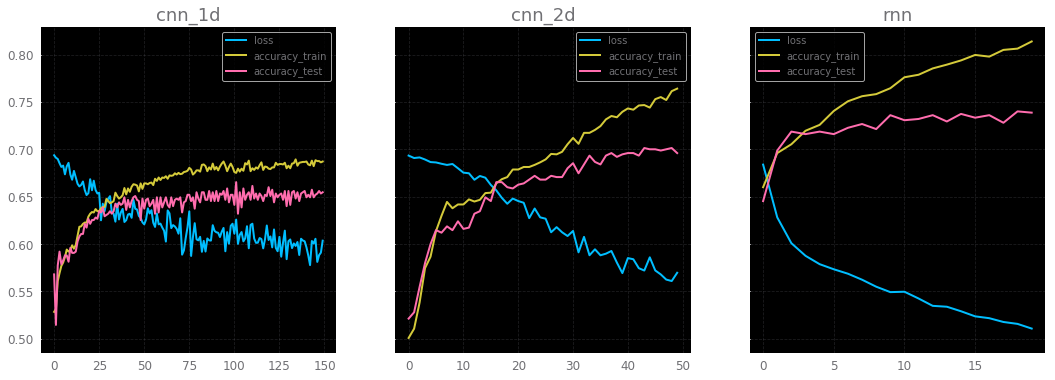

In [74]:
fig, ax = subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model in enumerate(models.groups.keys()):
    group = models.get_group(model)
    group[["loss", "accuracy_train", "accuracy_test"]].plot(ax=ax[i], use_index=False)
    ax[i].set_title(model)

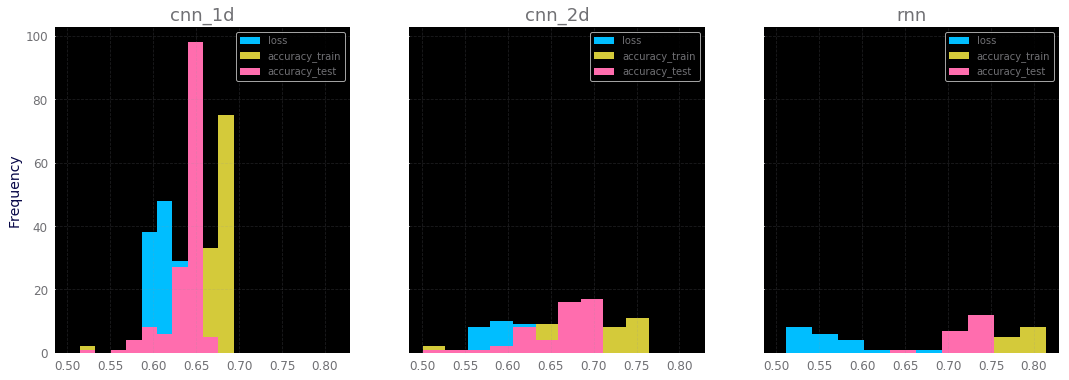

In [76]:
fig, ax = subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)

for i, model in enumerate(models.groups.keys()):
    group = models.get_group(model)
    group[["loss", "accuracy_train", "accuracy_test"]].plot(ax=ax[i], use_index=False, kind="hist")
    ax[i].set_title(model)

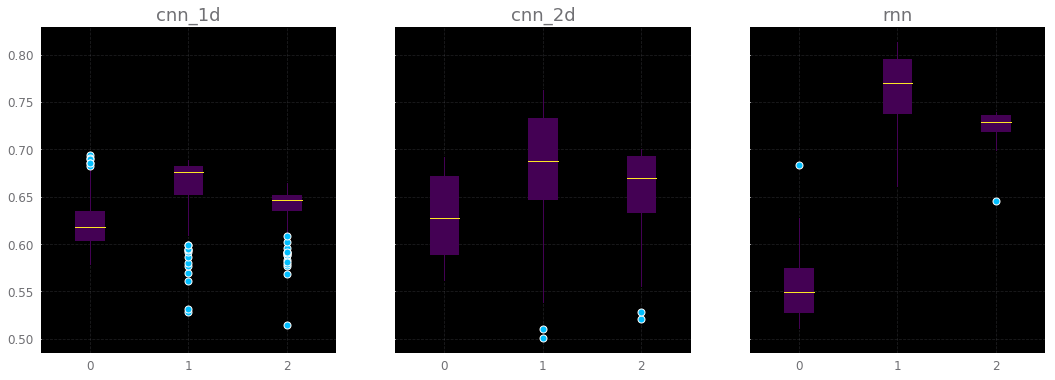

In [80]:
fig, ax = subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)

for i, model in enumerate(models.groups.keys()):
    group = models.get_group(model)
    group[["loss", "accuracy_train", "accuracy_test"]].plot(ax=ax[i], use_index=False, kind="box", cmap="viridis")
    ax[i].set_title(model)